### Fourier Transform

The Fourier Transform (FT) is a mathematical technique used to transform an image from the spatial domain into the frequency domain. It breaks down an image into its sine and cosine components, allowing analysis of patterns based on their frequency rather than pixel intensity.

In image processing, this helps in identifying textures, edges, and repetitive patterns that are not easily captured in the spatial domain

#### Steps for Feature Extraction

- Convert the image to grayscale for simplicity and consistency.

- Apply Discrete Fourier Transform (DFT) using cv.dft() to get complex frequency components (real and imaginary parts).

- Shift the zero-frequency component (DC component) to the center of the spectrum using np.fft.fftshift().

- Calculate the magnitude spectrum to get the intensity of frequency components using cv.magnitude().

- Flatten the magnitude spectrum to produce a 1D feature vector representing the frequency characteristics of the image.

#### Returns

- A 1D feature vector representing the strength of frequency components in the image.

- The feature vector length depends on the image size (e.g., for a 128×128 image → 16,384 values)

#### Advantages

- Captures global texture and frequency-based features that may not be obvious in pixel-based representations.

- Invariant to small translations in the spatial domain.

- Useful for detecting repetitive patterns, periodic textures, or directional edges.

#### For more information follow the below links:

[An Interactive Guide To The Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

[Edge detection in images using Fourier Transform](https://akshaysin.github.io/fourier_transform.html)





Feature vector length: 225141
Max value: 339.37, Min value: -9.31


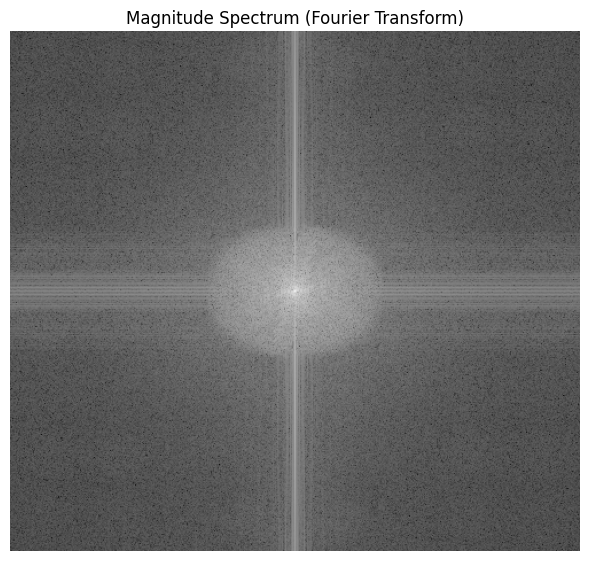

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read and preprocess the image
image_path = 'cancer.jpg'
original_image = cv.imread(image_path)

if original_image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert to grayscale
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Step 2: Compute the Discrete Fourier Transform (DFT)
# Convert image to float32 for DFT
float_image = np.float32(gray_image)

# Apply DFT to get complex output (real + imaginary parts)
dft_result = cv.dft(float_image, flags=cv.DFT_COMPLEX_OUTPUT)

# Step 3: Shift the zero-frequency component to the center of the spectrum
# Rearranging so that the low-frequency components are at the center
dft_shifted = np.fft.fftshift(dft_result)

# Step 4: Compute magnitude spectrum from real and imaginary parts
# This shows the strength of frequency components
magnitude_spectrum = 20 * np.log(
    cv.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1]) + 1e-5  # small value to avoid log(0)
)

# Step 5: Flatten the magnitude spectrum to use as a feature vector
feature_vector = magnitude_spectrum.reshape(-1)

print(f"Feature vector length: {len(feature_vector)}")
print(f"Max value: {np.max(feature_vector):.2f}, Min value: {np.min(feature_vector):.2f}")

# Optional: Visualize the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')
plt.tight_layout()
plt.show()
